# Myriad challenge 

Autor : **Ricardo Manzanedo**

## Introducción

En este documento vamos a clasificar series temporales en reales o sintéticas. Para ello, implementamos distintos algoritmos de clasificación, como pueden ser: Árbol de decisión, adaptive boosting, máquinas de vectores de soporte, bosques aleatorios, K vecinos más próximos, Voting Classifier y una red neuronal recurrente.

Los resultados obtenidos son bastante pobres ya que se asemejan a una decisión aleatoria, alcanzando una precisión en torno al 50% en todos ellos. No obstante, como se demostraremos a continuación nos quedaremos con Voting classifier que es una combinación de diferentes algoritmos.


**Nota:** Este documento esta estructurado para ejecutarse secuencialmente de principio a fin. Algunos de las precisiones obtenidas pueden variar debido a que ciertos algoritmos utilizados 

### Análisis previo
Primero realizamos un rápido análisis de los datos, donde comprobamos la calidad de los datos y realizamos una gráfica con dos series temporales para compararlas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1=pd.read_csv('MyriadChallenge/TrainMyriad.csv')
dftest=pd.read_csv('MyriadChallenge/TestMyriad.csv')

In [3]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,Class
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.000486,0.001032,0.001140,7.375817e-04,4.459286e-04,0.000237,8.479412e-04,1.308039e-03,9.231755e-04,0.000316,...,0.000285,0.000430,0.001387,0.000536,0.000192,9.216463e-04,0.000796,0.000325,0.000477,0.489400
std,0.022064,0.024896,0.022821,2.281738e-02,2.269435e-02,0.023668,2.315789e-02,2.310966e-02,2.291001e-02,0.022837,...,0.021994,0.022217,0.022296,0.023514,0.021520,2.250196e-02,0.021300,0.023569,0.023480,0.499938
min,-0.193774,-0.191102,-0.139600,-3.816964e-01,-2.283394e-01,-0.232066,-2.335412e-01,-1.844170e-01,-2.428337e-01,-0.182250,...,-0.337433,-0.137577,-0.179889,-0.227332,-0.138384,-2.072785e-01,-0.149109,-0.185041,-0.239711,0.000000
25%,-0.008880,-0.008409,-0.008510,-8.872927e-03,-8.683706e-03,-0.009016,-8.697229e-03,-8.425944e-03,-8.296891e-03,-0.008705,...,-0.008948,-0.009055,-0.008167,-0.008997,-0.008965,-8.153697e-03,-0.008501,-0.009011,-0.008921,0.000000
50%,0.000000,0.000000,0.000000,1.000000e-10,1.500000e-10,0.000000,1.000000e-10,5.000000e-10,1.000000e-10,0.000000,...,0.000000,-0.000000,0.000360,0.000000,0.000000,1.000000e-10,0.000000,0.000000,-0.000000,0.000000
75%,0.009719,0.010044,0.009643,9.812382e-03,1.003389e-02,0.009271,1.018698e-02,1.067033e-02,9.931832e-03,0.009547,...,0.009287,0.009685,0.010718,0.009564,0.009604,1.007285e-02,0.009921,0.009582,0.009870,1.000000
max,0.230594,0.404144,0.247719,1.979167e-01,2.180451e-01,0.305483,2.560722e-01,2.219020e-01,1.985068e-01,0.280512,...,0.210317,0.265522,0.171965,0.343498,0.154339,2.005155e-01,0.174033,0.587822,0.287783,1.000000


In [4]:
df1.describe().mean(axis=1)

count    5000.000000
mean        0.002544
std         0.025137
min        -0.246661
25%        -0.008632
50%         0.000012
75%         0.013570
max         0.289092
dtype: float64

In [5]:
x_tr=df1.drop(columns=['Class'])
y_tr=df1['Class']

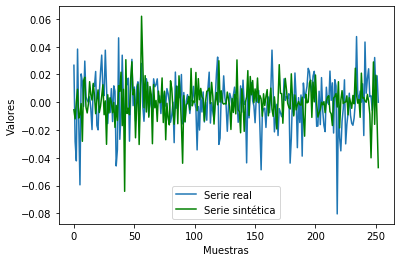

La línea azul corresponde a una serie: 1.0
La línea verde corresponde a una serie: 0.0


In [6]:
x=df1.iloc[500].values
x1=df1.iloc[4001].values

plt.plot(x[:len(x)-1], label='Serie real')
plt.plot(x1[:len(x)-1],c='g', label='Serie sintética')
plt.ylabel('Valores')
plt.xlabel('Muestras')
plt.legend()
plt.show()

print('La línea azul corresponde a una serie:', x[-1])
print('La línea verde corresponde a una serie:', x1[-1])

### Decision tree

En este apartado, hemos separado los datos del entrenamiento en dos grupos:
    * Train (75%)
    * Test (25%)

Una vez hecha esta separación, creamos un árbol de decisión con una profundidad máxima de 7 y un mínimo de 95 muestras por nodo. Como podemos comprobar, la precisión del modelo sobre el Train es de un 62.5% y 53.6% sobre el Test. Esta precisión se podría mejorar sobre el Train si aumentamos la profundidad, pero no nos interesa para no tener overfitting.  

Por último, realizamos una representación del árbol de decisión donde podemos comprobar las decisiones que toma el algoritmo. Como se muestra en la tabla inferior, la precisión de este algoritmo se asemeja a una distribución binomial. Por tanto, podemos afirmar que es un algoritmo ineficiente.

| Grupo | Precisión |
|:----------:|:-----:|
| Train | 62.5 % |
| Test | 53.6 % |

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.metrics import roc_auc_score, accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, random_state=1, shuffle=False )

In [9]:
tree = DecisionTreeClassifier(max_depth=7, random_state=0,min_samples_leaf=95)

tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=95, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [10]:
y_train_pred = tree.predict_proba(X_train)
y_test_pred = tree.predict_proba(X_test)
tree_train = roc_auc_score(y_train, y_train_pred[:, 1])
tree_test = roc_auc_score(y_test, y_test_pred[:, 1])
print('Precisión modelo train/test  {0:.3f}/{1:.3f}'
      .format(tree_train, tree_test))

Precisión modelo train/test  0.625/0.536


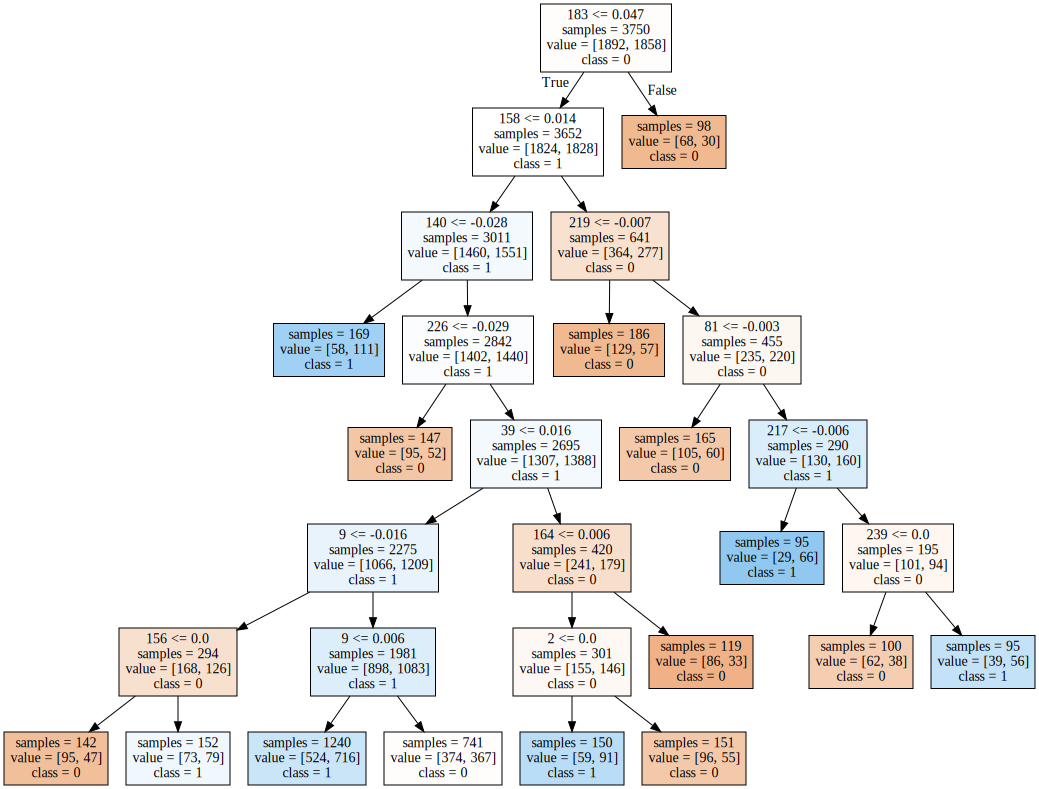

In [11]:
export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
feature_names=x_tr.columns.values, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


### Adaboost

En esta sección, comprobamos el algoritmo Adaptive Boosting y vemos una mejoría de la precisión en el Train hasta alcanzar un 100.0%. Sin embargo, la predicción en el Test se mantiene prácticamente constante con un 53.1%. Como comentamos en el apartado anterior esto se debe a un overfitting en el Train, que provoca una peor predicción del Test. Por tanto, podemos descartar directamente este algoritmo para este caso.

| Grupo | Precisión |
|:----------:|:-----:|
| Train | 100.0 % |
| Test | 53.1 % |

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=50, learning_rate=.7, random_state=1)

ada = ada.fit(X_train, y_train)

In [14]:
y_train_pred = ada.predict_proba(X_train)
y_test_pred = ada.predict_proba(X_test)
ada_train = roc_auc_score(y_train, y_train_pred[:, 1])
ada_test = roc_auc_score(y_test, y_test_pred[:, 1])
print('Precisión modelo train/test  {0:.3f}/{1:.3f}'.format(ada_train, ada_test))


Precisión modelo train/test  1.000/0.531


### SVM

En este apartado, implementamos Máquinas de vectores de soporte. Para ello, utilizamos Grid Search con validación cruzada con el objetivo de encontrar la mejor configuración para nuestros datos. Una vez localizados estos parámetros, los guardamos para futuras veces debido a que Grid Search consume mucho tiempo. Las precisiones obtenidas se asemejan bastante, obteniendo una precisión sobre el Train del 89.0%  y 51.7% sobre el Test. 

| Grupo | Precisión |
|:----------:|:-----:|
| Train | 89.0 % |
| Test | 51.7 % |

In [15]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [16]:
svc=svm.SVC()
param_grid = {'kernel':['linear','rbf','poly'], 'C':[1,10,1000], 'gamma':['scale', 'auto']}

svc_cv = GridSearchCV(svc, param_grid, cv=10)

In [17]:
# svc_cv.fit(X_train, y_train)
# svc_cv.best_params_  # return {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
# svc_cv.best_score_

In [18]:
svc=svm.SVC(C= 1, gamma= 'scale', kernel= 'rbf', probability=True)

svc.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
y_train_pred = svc.predict_proba(X_train)
y_test_pred = svc.predict_proba(X_test)
svc_train = roc_auc_score(y_train, y_train_pred[:, 1])
svc_test = roc_auc_score(y_test, y_test_pred[:, 1])
print('Precisión modelo train/test  {0:.3f}/{1:.3f}'.format(svc_train, svc_test))

Precisión modelo train/test  0.890/0.517


### Random forest

En esta parte, realizamos el algoritmo de bosques aleatorios. La precisión de este método es muy similar a las conseguidas previamente como nos muestra la siguiente tabla:

| Grupo | Precisión |
|:----------:|:-----:|
| Train | 100.0 % |
| Test | 53.2 % |

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf= RandomForestClassifier(n_estimators=1000,min_samples_leaf=10)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_train_pred = rf.predict_proba(X_train)
y_test_pred = rf.predict_proba(X_test)
rf_train = roc_auc_score(y_train, y_train_pred[:, 1])
rf_test = roc_auc_score(y_test, y_test_pred[:, 1])
print('Precisión modelo train/test  {0:.3f}/{1:.3f}'.format(rf_train, rf_test))

Precisión modelo train/test  1.000/0.532


### KNN

En este apartado, realizamos la implementación de los K vecinos más próximos. En esta implementación, hemos modificado la métrica de la distancia calculada entre las distintas muestras para maximizar la precisión del modelo sobre el Test. Con este algoritmo obtenemos una precisión de:

| Grupo | Precisión |
|:----------:|:-----:|
| Train | 89.0 % |
| Test | 52.9 % |

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
neigh = KNeighborsClassifier(n_neighbors=2, metric='cosine')

neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [25]:
y_train_pred = neigh.predict_proba(X_train)
y_test_pred = neigh.predict_proba(X_test)
neigh_train = roc_auc_score(y_train, y_train_pred[:, 1])
neigh_test = roc_auc_score(y_test, y_test_pred[:, 1])
print('Precisión modelo train/test  {0:.3f}/{1:.3f}'.format(neigh_train, neigh_test))

Precisión modelo train/test  0.890/0.529


###  Voting classifier

En esta sección, utilizamos un método de ensemble learning que consiste en combinar varias predicciones no muy buenas y que tengan poca correlación entre ellas para generar una predicción más robusta. En nuestro caso, comprobamos primero la correlación de los distintos algoritmos utilizados anteriormente. Acto seguido, procedemos a utilizar Voting Classifier en voting modo soft. 

Con este método conseguimos mejorar la predicción del test hasta conseguir un 54.7%, como comprobamos en la tabla:

| Grupo | Precisión |
|:----------:|:-----:|
| Train | 99.7 % |
| Test | 54.7 % |

In [26]:
print(np.corrcoef(tree.predict_proba(X_test)[:, 1],ada.predict_proba(X_test)[:, 1])[0][1], '\n',
      np.corrcoef(tree.predict_proba(X_test)[:, 1],svc.predict_proba(X_test)[:, 1])[0][1], '\n',
      np.corrcoef(tree.predict_proba(X_test)[:, 1], rf.predict_proba(X_test)[:, 1])[0][1], '\n',
      np.corrcoef(tree.predict_proba(X_test)[:, 1], neigh.predict_proba(X_test)[:, 1])[0][1], '\n',
      np.corrcoef(ada.predict_proba(X_test)[:, 1], svc.predict_proba(X_test)[:, 1])[0][1], '\n',
      np.corrcoef(ada.predict_proba(X_test)[:, 1], rf.predict_proba(X_test)[:, 1])[0][1], '\n',
      np.corrcoef(ada.predict_proba(X_test)[:, 1], neigh.predict_proba(X_test)[:, 1])[0][1], '\n',
      np.corrcoef(svc.predict_proba(X_test)[:, 1], rf.predict_proba(X_test)[:, 1])[0][1], '\n',
      np.corrcoef(svc.predict_proba(X_test)[:, 1], neigh.predict_proba(X_test)[:, 1])[0][1], '\n',
      np.corrcoef(rf.predict_proba(X_test)[:, 1], neigh.predict_proba(X_test)[:, 1])[0][1], '\n',)

0.13697152591851813 
 0.15179970325352335 
 0.27608351112058244 
 0.06224859557479576 
 0.2420987867859341 
 0.34054068353384687 
 0.06369160643048356 
 0.6500836122856795 
 0.16175913634695474 
 0.1190496532171221 



In [27]:
from sklearn.ensemble import VotingClassifier


In [28]:
eclf2 = VotingClassifier(estimators=[('tr', tree), ('ad', ada), ('sv', svc),('rf',rf), ('knn', neigh)],voting='soft')

eclf2 = eclf2.fit(X_train, y_train)

In [29]:
y_train_pred = eclf2.predict_proba(X_train)
y_test_pred = eclf2.predict_proba(X_test)
eclf2_train = roc_auc_score(y_train, y_train_pred[:, 1])
eclf2_test = roc_auc_score(y_test, y_test_pred[:, 1])
print('Precisión modelo train/test  {0:.3f}/{1:.3f}'.format(eclf2_train, eclf2_test))

Precisión modelo train/test  0.997/0.547


### RNN

Por último, implementamos una red neuronal recurrente. Para poder correr esta parte necesitaríamos instalar todas las librerías del archivo 'requirements.txt' con el comando:

    pip3 install -r requirements.txt

Una vez instaladas todas las librerías, entrenamos la red con el siguiente comando:
    
    Python3 train.py --data_dir $path_del_archivo_csv
    
Para terminar, creamos un CSV con las predicciones del archivo TestMyriad.csv:
    
    Python3 test.py --data_dir_test $path_del_archivo_csv
    
La precisión de esta red neuronal tampoco es muy eficiente debido a que durante el entrenamiento solo llega a precisiones máximas en torno a 52.0 %. Por lo que no utilizaremos esta predicción en el resultado final.


## Conclusiones

En resumen, todas las metodologías utilizadas previamente tienen una precisión similar sobre el Test. Por lo que, escogeremos el algoritmo que ha tenido mayor precisión y es más robusto, **ensemble learning**. Sin embargo, podríamos utilizar la predicción del árbol de decisión debido a que consume mucho menos computacionalmente hablando, muy fácil de entender y la precisión es muy parecida.  


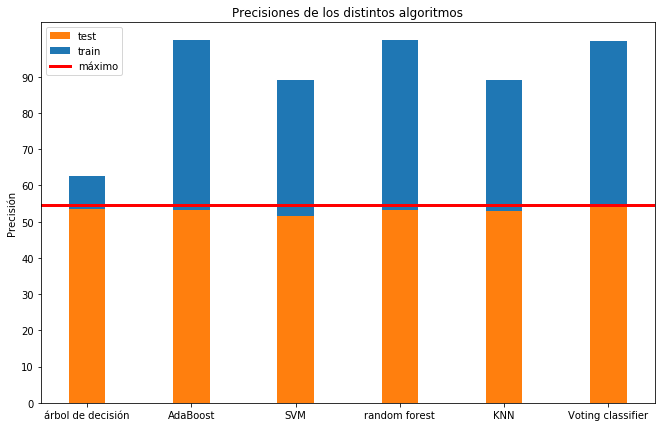

In [30]:
preds_test=[tree_test,ada_test,svc_test,rf_test,neigh_test,eclf2_test]
preds_train=[tree_train,ada_train,svc_train,rf_train,neigh_train,eclf2_train]
ind = np.arange(6)
width = 0.35
plt.figure(figsize=(11, 7))

p2 = plt.bar(ind, np.asarray(preds_train)*100, width)
p1 = plt.bar(ind, np.asarray(preds_test)*100, width)
p3=plt.axhline(y=eclf2_test*100 ,linewidth=3, color='r')


plt.ylabel('Precisión')
plt.title('Precisiones de los distintos algoritmos')
plt.xticks(ind, ('árbol de decisión', 'AdaBoost', 'SVM', 'random forest', 'KNN', 'Voting classifier'))
plt.yticks(np.arange(0, 100, 10))
plt.legend((p1[0], p2[0],p3), ('test', 'train', 'máximo'))

plt.show()

## Futuros trabajos

Como vemos a lo largo del documento, la precisión obtenida es muy similar a la de una elección aleatoria. Por lo que planteamos futuras líneas de investigación:

**1.** La utilización de una red neuronal recurrente que prediga los últimos valores de las series y calcular el error cuadrático medio de las predicciones
    
**2.** La implementación de un error más complejo en el entrenamiento de la red neuronal, que se encargue de reducir las distancias entre series que pertenecen al mismo grupo y maximice las distancias entre series que pertenecen a distintos grupos.

### Creación del archivo con las predicciones

In [31]:
# import csv

In [32]:
# preds = eclf2.predict_proba(dftest)[:, 1]

In [33]:
# with open('./submission.csv', 'w', newline='') as myfile:
#     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#     wr.writerow(['class'])
#     for i in preds:
#         wr.writerow([i])

Muchas gracias por su tiempo!:)